# plot up temperature time series of ensemble

In [1]:
# from netCDF4 import Dataset
import numpy as np
# from collections import namedtuple
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

In [2]:
## Read in models
modout=xr.open_dataset('historical/globalavg/historicalEnsemble.nc')

modout['time']=pd.to_datetime(modout.time, format='%Y%m%d.%f')
modout=modout.groupby('time.year').mean(dim='time') # annual average

modout=modout.squeeze()
modout

<xarray.Dataset>
Dimensions:     (lev: 100, sfc: 100, year: 156)
Coordinates:
    lon         float64 0.0
    lat         float64 0.0
  * sfc         (sfc) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
  * lev         (lev) float64 5e+04 5e+04 5e+04 5e+04 5e+04 5e+04 5e+04 ...
  * year        (year) int64 1850 1851 1852 1853 1854 1855 1856 1857 1858 ...
Data variables:
    tsurf       (year, sfc) float32 287.7017 287.5023 287.4954 287.52487 ...
    srad0       (year, sfc) float32 239.6803 239.55573 239.87231 239.64044 ...
    trad0       (year, sfc) float32 -239.55396 -239.2818 -239.42409 ...
    sraf0       (year, sfc) float32 287.264 287.44174 287.32672 287.22113 ...
    traf0       (year, sfc) float32 -264.2012 -263.7263 -263.87842 -263.9629 ...
    lwcre       (year, sfc) float32 24.647268 24.444519 24.45434 24.56279 ...
    swcre       (year, sfc) float32 -47.5837 -47.886013 -47.45442 -47.58069 ...
    temp2       (year, sfc) float32 286.99142 286.8018 286.7908 286.81262

In [3]:
def colorplot(ax):
    
    almost_black = '#262626' # tweek from Thorsten
    
    for spx in ['top','right']:
            ax.spines[spx].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
    # set axis positions
#     ax.yaxis.set_label_position(pspines[0]) 
#     ax.xaxis.set_label_position(pspines[1]) 
    
    for spx in ['bottom','left']:
        ax.spines[spx].set_linewidth(0.5)
        ax.spines[spx].set_color(almost_black)
    
    for ticks in ax.xaxis.get_ticklines() + ax.yaxis.get_ticklines():
        ticks.set_color(almost_black)

In [4]:
## load GISTEMP data
import urllib

f1 = urllib.request.urlopen('http://data.giss.nasa.gov/gistemp/tabledata_v3/GLB.Ts+dSST.txt')
tdata=f1.readlines();f1.close()
gisst=[]

for ii in tdata:
    if ii[0] != 49 and ii[0] != 50: continue
    for kk in (ii[:65].split())[1:]:
        # if kk == '': continue
        try:
            gisst.append(float(kk)/100.)
        except ValueError:
            continue
    
giss1=[np.average(gisst[ii*12:ii*12+12]) for ii in range(len(gisst)//12)]
gissta=xr.DataArray(giss1,dims='year',coords={'year':np.arange(len(giss1))+1880.5})

## Figure 1

visualize the temperature time series

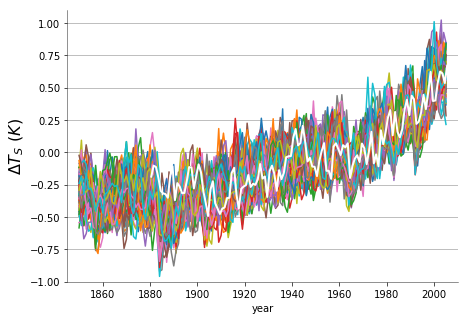

In [5]:
figure(figsize=(7,5))
t1=modout.temp2-modout.temp2.sel(year=slice(1951,1980)).mean(dim='year')
t1.plot.line(x='year',add_legend=False)
gissta.plot(color='w',lw=2)
# plot(gissta.time,gissta.data,'w',lw=2)
ylabel('$\Delta T_S$ ($K$)',fontsize=16)
gca().yaxis.grid(True) 
xlim(1845,2010);ylim(-1,1.1);
colorplot(gca())
title('');
# savefig('fig1.eps')